# 1. dataset: data_wine.csv

https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset


## Preguntas

1. ¿Qué problema de clasificación se busca resolver?

    Los datos son el resultado de un análisis químico de vinos cultivados en la misma región de Italia por tres cultivadores diferentes.

2. ¿Cuál es el dominio de entrada (caracteristicas) disponible?

    alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target


3. ¿Cuántas muestras y características hay en el conjunto de datos?

    hay 178 muestras

4. ¿Cuántas clases o categorías tiene el conjunto de datos Wine?

    class_0 (59), class_1 (71), class_2 (48)

5. ¿Qué tipo de problema de aprendizaje supervisado estamos abordando con este conjunto de datos? Clasificación o Regresión?

    estamos abordando un problema de clasificacion

6. ¿Cuál es el rendimiento de los modelos de aprendizaje para resolver este problema?

    f1_score

7. ¿Cómo se puede interpretar las métricas de precision y recall?

8. ¿Cuáles son las características más influyentes en el modelo de clasificación?


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Cargar datos desde CSV
wines = pd.read_csv('data_wine.csv')

In [4]:
wines

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:
# Dividir los datos en características (X) y variable objetivo (y)
X = wines.drop('target', axis=1)
y = wines['target']

In [6]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

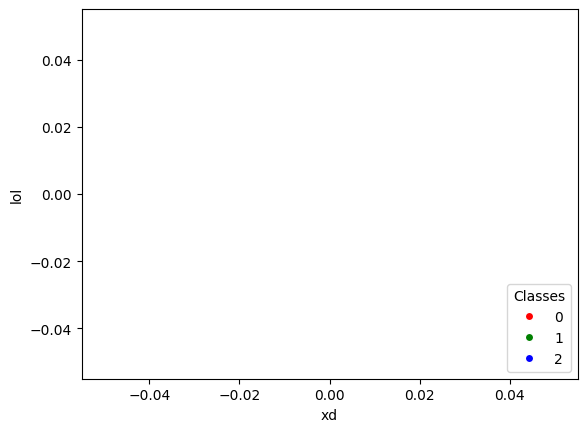

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos desde CSV
wines = pd.read_csv('data_wine.csv')

# Mapear variedades a colores
color_map = {'0': 'red', '1': 'green', '2': 'blue'}

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar los puntos
scatter = ax.scatter(wines['alcohol'], wines['malic_acid'], c=wines['target'].map(color_map))

# Establecer etiquetas de los ejes
ax.set(xlabel='', ylabel='')

# Crear leyenda manualmente
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, label=label) for label, color in color_map.items()]
ax.legend(handles=legend_elements, loc="lower right", title="Classes")

plt.show()


In [22]:
# Dividir dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [23]:
# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Vicen\anaconda3\envs\INFO257\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
# Ver los coeficientes y el término de intercepción
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

Coeficientes: [[-0.0310934  -0.00395788 -0.02956    -0.52001894  0.02572752  0.02902377
   0.09108991 -0.00135779  0.04010577  0.1023194   0.00361523  0.08171598
   0.00849889]
 [ 0.0298363  -0.09959786  0.03430101  0.53162898 -0.07744959  0.15785727
   0.23726187  0.00208288  0.09948351 -0.53917317  0.06790407  0.25363928
  -0.00098454]
 [ 0.0012571   0.10355574 -0.00474101 -0.01161004  0.05172207 -0.18688105
  -0.32835178 -0.00072509 -0.13958928  0.43685377 -0.07151929 -0.33535526
  -0.00751434]]
Intercepto: [-0.01788733  0.03000495 -0.01211762]


In [24]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

In [25]:
# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de regresión logística en el conjunto de prueba: {:.2f}".format(accuracy))

Precisión del modelo de regresión logística en el conjunto de prueba: 0.97


# 2. dataset: Kaggle

https://www.kaggle.com/datasets?fileType=csv&tags=13302-Classification&minUsabilityRating=9.00+or+higher&feedbackIds=8


Elegir un problema de clasificación con la lista de datasets disponibles y comparar el rendimiento de distintos modelos de clasificación supervisada.